In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<h2> Load The Dataset

In [3]:
df = pd.read_csv('healthcare_data.csv')
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1676, 35)

In [5]:
df.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'Shift',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.dtypes

EmployeeID                   int64
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
Shift                        int64
TotalWorkingYears   

<h3> Data Types Of Columns Graph

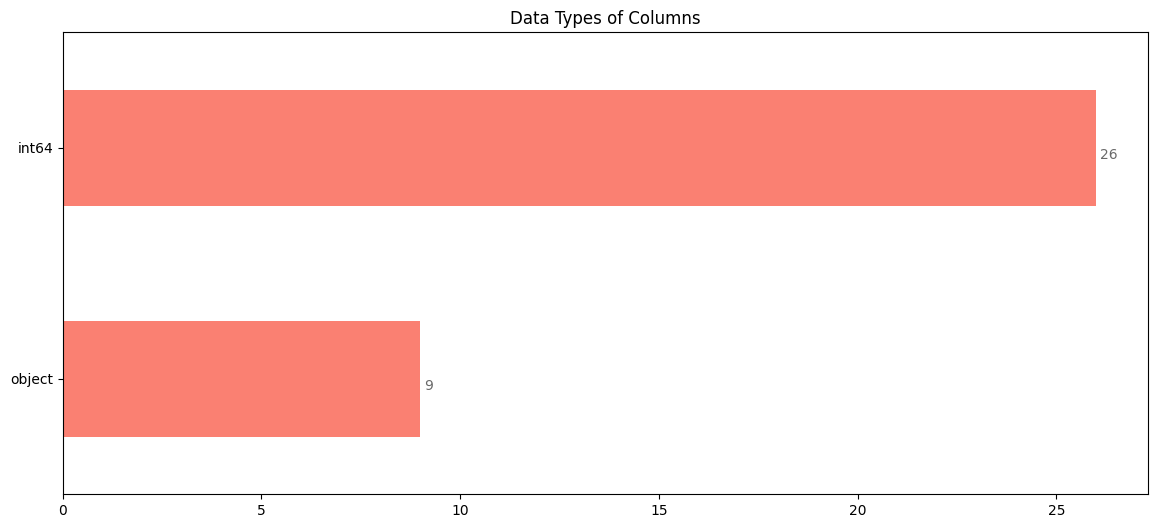

In [7]:
fig, ax = plt.subplots(figsize=(14, 6))
plt.title('Data Types of Columns')
df.dtypes.value_counts().sort_values().plot(kind='barh', color='salmon')
# Writes counts end of the bar
for i in ax.patches:
    ax.text(i.get_width()+.1, i.get_y()+.2, str(i.get_width()), fontsize=10, color='dimgrey')
plt.show()

<h3> Attrition Rate

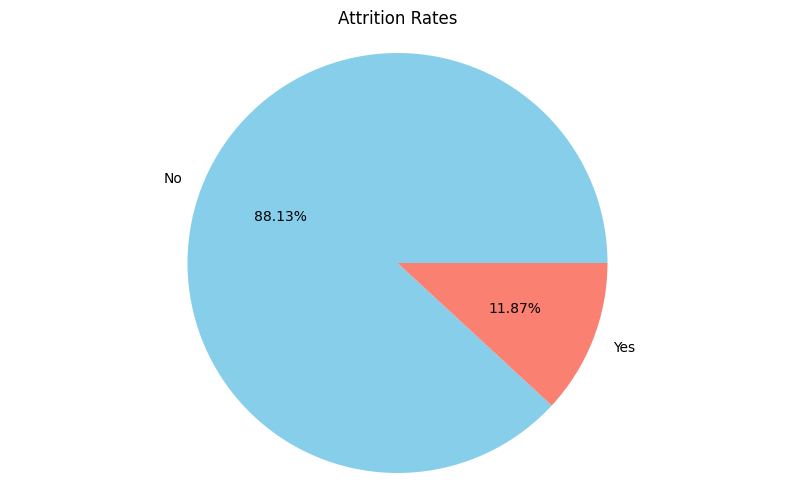

In [8]:
# Count the occurrences of each category in 'Attrition' column
attrition_counts = df['Attrition'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.title('Attrition Rates')
plt.pie(attrition_counts,autopct='%1.2f%%',labels=attrition_counts.index, colors=['skyblue', 'salmon'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show plot
plt.show()

<h4> Distribution of Age

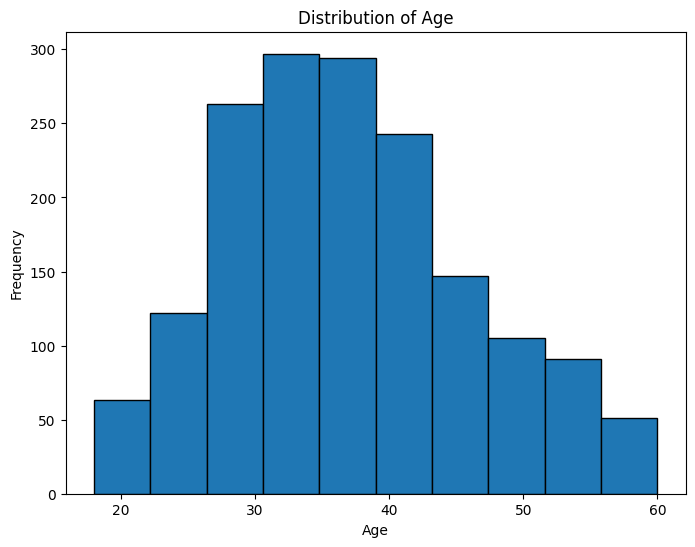

In [9]:
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=10, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

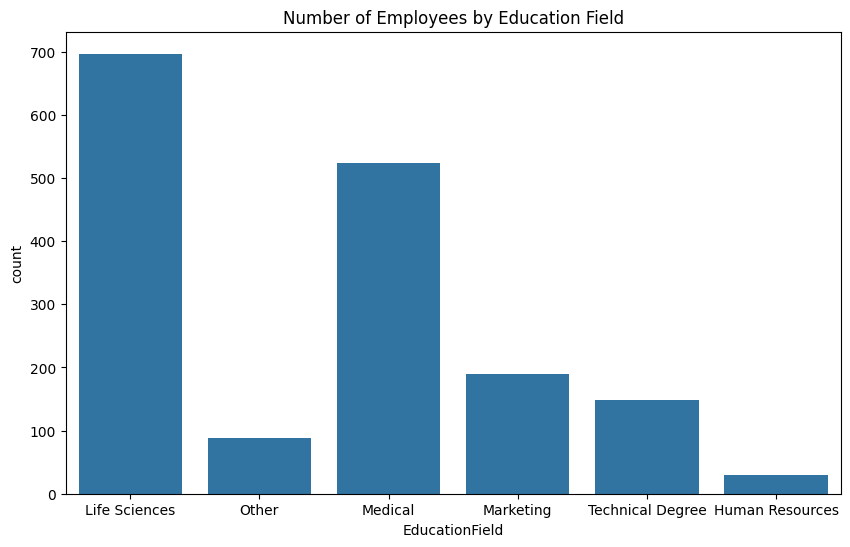

In [10]:
# Eğitim Alanına Göre Çalışan Sayısı (Number of Employees by Education Field)
plt.figure(figsize=(10, 6))
sns.countplot(x='EducationField', data=df)
plt.title('Number of Employees by Education Field')
plt.show()

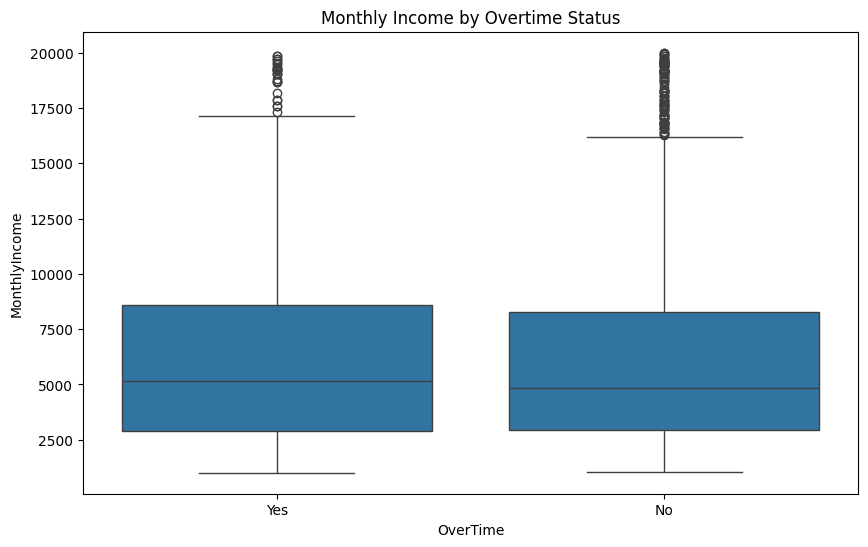

In [11]:
# Mesai Durumuna Göre Aylık Gelir (Monthly Income by Overtime Status)
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverTime', y='MonthlyIncome', data=df)
plt.title('Monthly Income by Overtime Status')
plt.show()

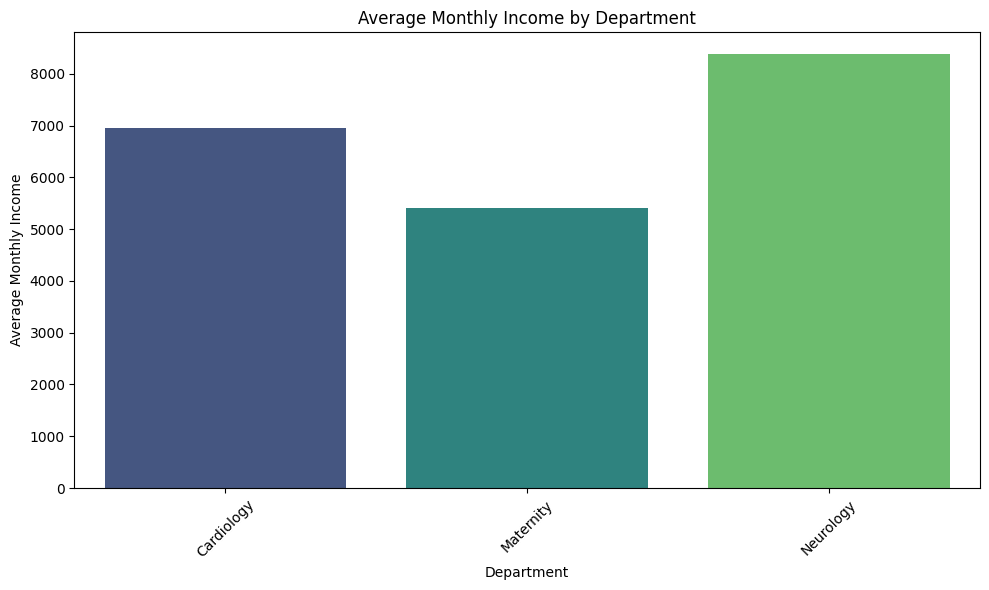

In [12]:
# Departmanlara Göre Ortalama Aylık Gelir (Average Monthly Income by Department)
plt.figure(figsize=(10, 6))
sns.barplot(x='Department', y='MonthlyIncome', data=df, palette='viridis', ci=None)
plt.title('Average Monthly Income by Department')
plt.xlabel('Department')
plt.ylabel('Average Monthly Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


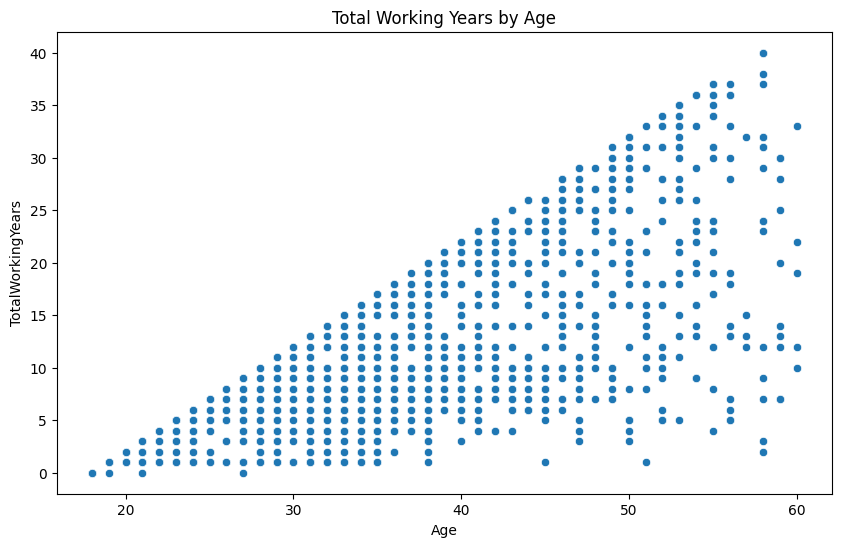

In [13]:
# Yaşa Göre Toplam Çalışma Yılları (Total Working Years by Age)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='TotalWorkingYears', data=df)
plt.title('Total Working Years by Age')
plt.show()

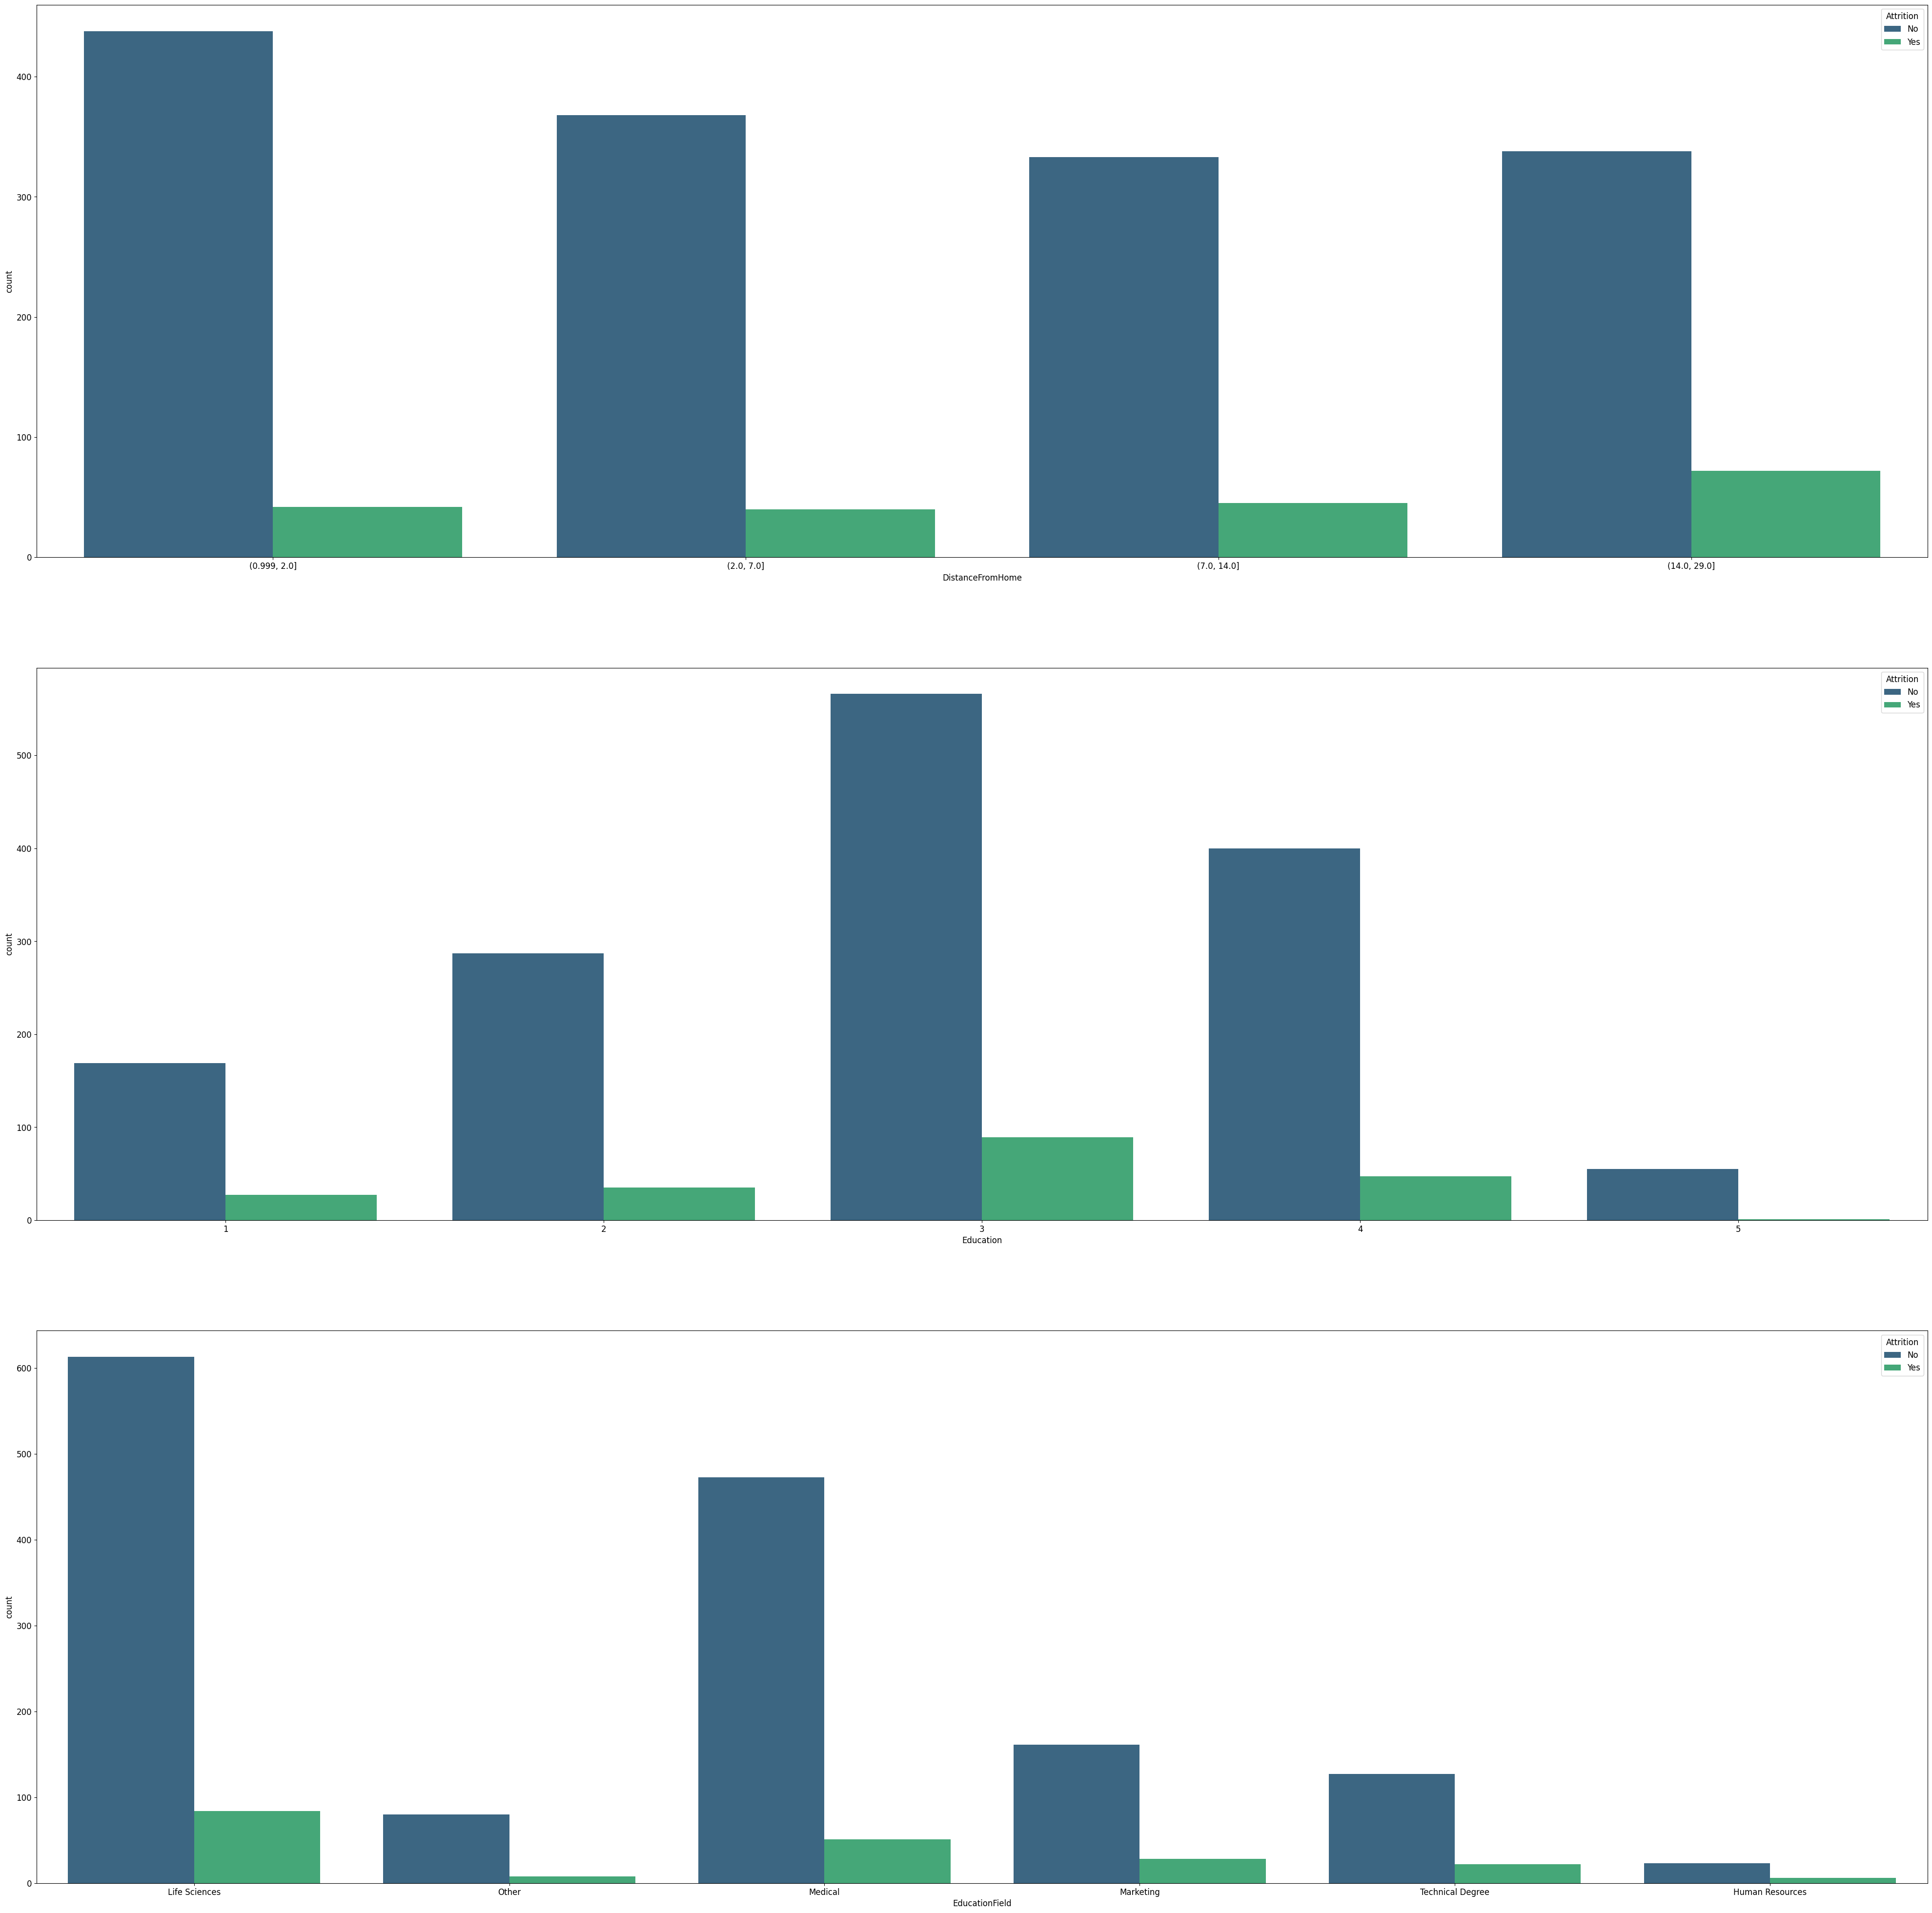

In [14]:
# countplots of all variables according to Attrition
selected_cols = [ 'DistanceFromHome', 'Education', 'EducationField']
plt.rcParams['font.size'] = 12
fig, ax = plt.subplots(3, 1, figsize=(50, 50))
for variable, subplot in zip(df[selected_cols], ax.flatten()):
    if df[variable].unique().shape[0] > 10:
        variable = pd.qcut(df[variable], q=[0, .25, .5, .75, 1.], duplicates='drop')   
    sns.countplot(x=variable, hue='Attrition', data=df, ax=subplot, palette='viridis', orient='h')


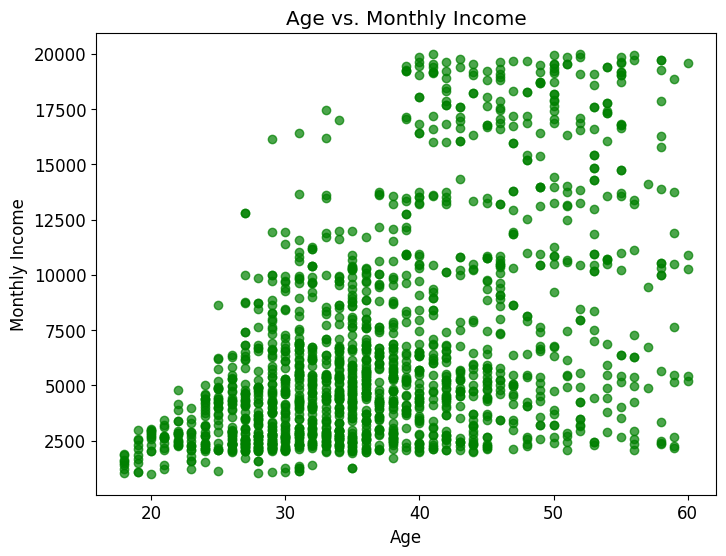

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['MonthlyIncome'], color='green', alpha=0.7)
plt.title('Age vs. Monthly Income')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.grid(False)
plt.show()

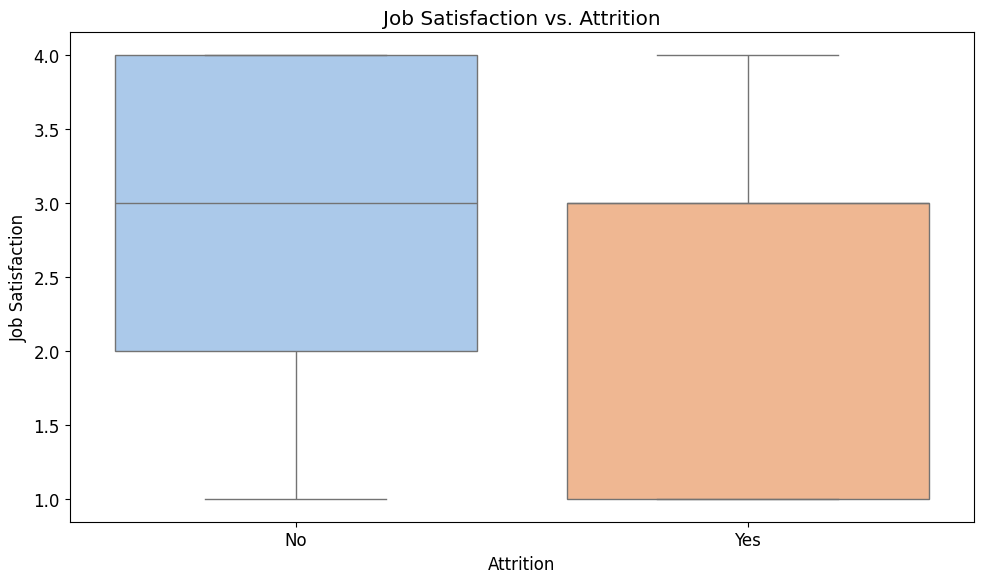

In [16]:
# İş Tatmini ve İşten Ayrılma Durumu (Job Satisfaction vs. Attrition)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df, palette='pastel')
plt.title('Job Satisfaction vs. Attrition')
plt.xlabel('Attrition')
plt.ylabel('Job Satisfaction')
plt.tight_layout()
plt.show()

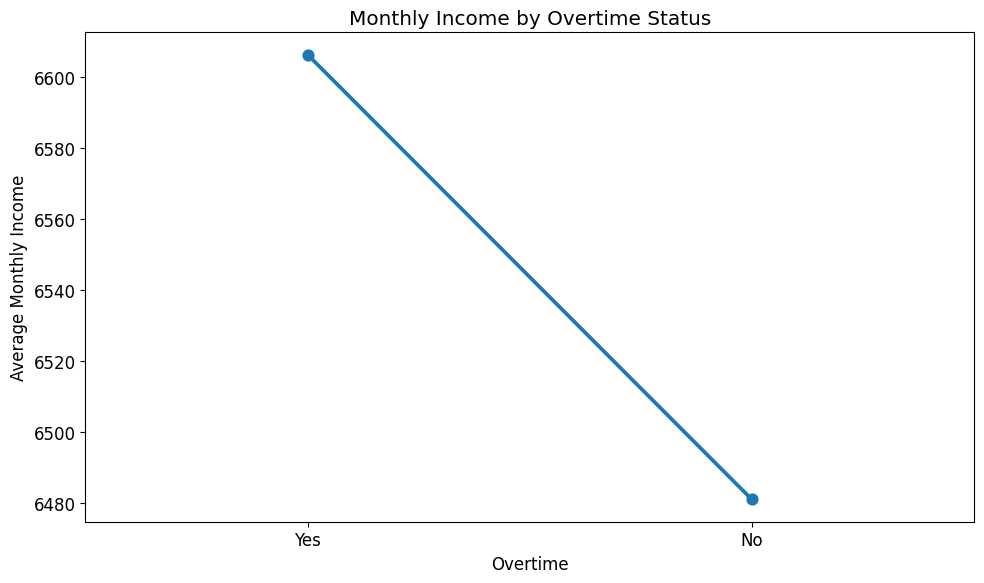

In [17]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='OverTime', y='MonthlyIncome', data=df, ci=None)
plt.title('Monthly Income by Overtime Status')
plt.xlabel('Overtime')
plt.ylabel('Average Monthly Income')
plt.tight_layout()
plt.show()


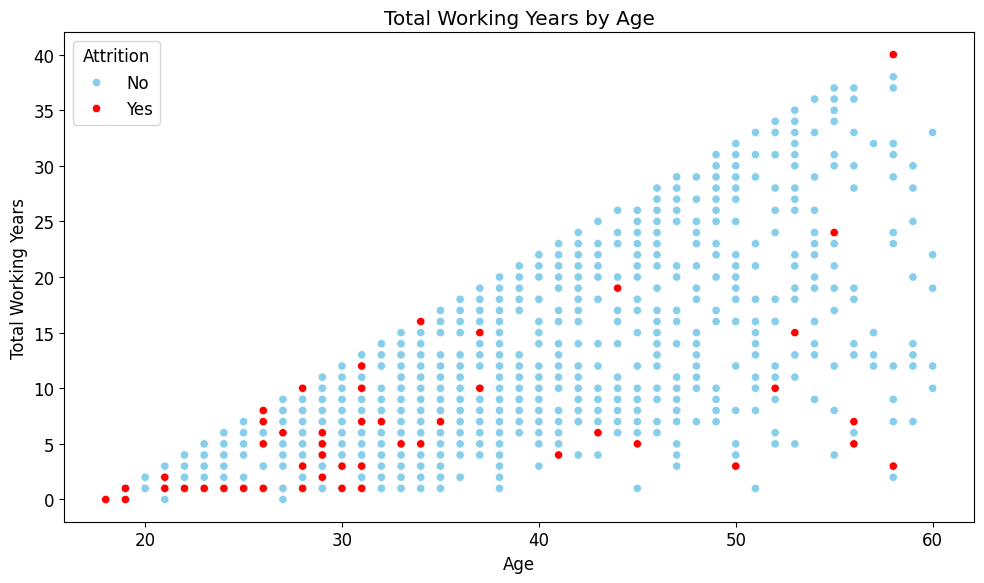

In [18]:
# Yaşa Göre Toplam Çalışma Yılları (Total Working Years by Age)


custom_palette = {'Yes': 'red', 'No': 'skyblue'}
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='TotalWorkingYears', data=df, hue='Attrition', palette=custom_palette, edgecolor='white', color='black')
plt.title('Total Working Years by Age')
plt.xlabel('Age')
plt.ylabel('Total Working Years')
plt.tight_layout()
plt.legend(title='Attrition')
plt.show()


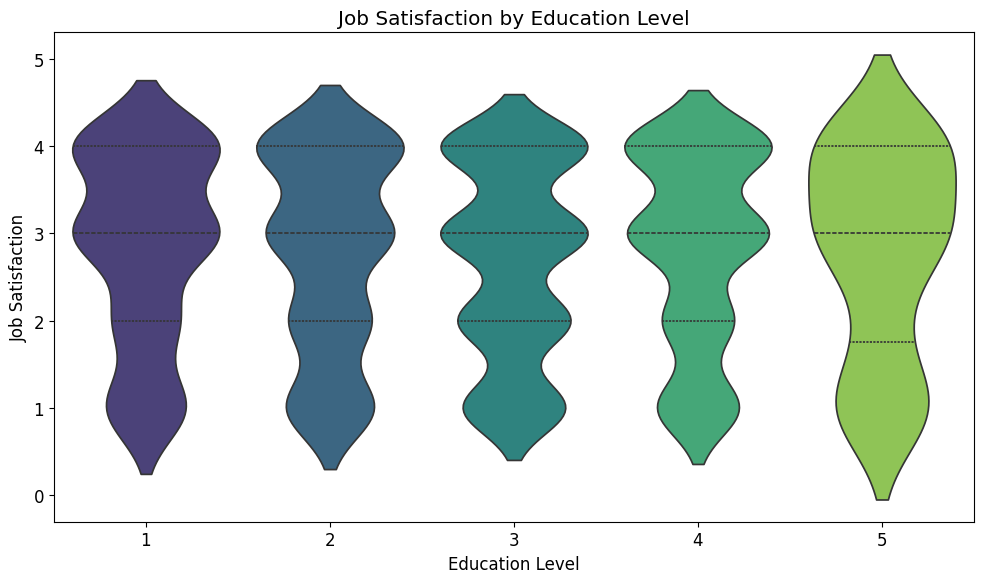

In [19]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Education', y='JobSatisfaction', data=df, palette='viridis', inner='quartile')
plt.title('Job Satisfaction by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Job Satisfaction')
plt.tight_layout()
plt.show()


<h1> Data Manipulation

In [20]:
# Remove unnecessary columns
df = df.drop(['EmployeeCount', 'EmployeeID', 'Over18', 'StandardHours'], axis=1)

<h5> Check Missing Values

In [21]:
# Check for missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [22]:
# Info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1676 non-null   int64 
 1   Attrition                 1676 non-null   object
 2   BusinessTravel            1676 non-null   object
 3   DailyRate                 1676 non-null   int64 
 4   Department                1676 non-null   object
 5   DistanceFromHome          1676 non-null   int64 
 6   Education                 1676 non-null   int64 
 7   EducationField            1676 non-null   object
 8   EnvironmentSatisfaction   1676 non-null   int64 
 9   Gender                    1676 non-null   object
 10  HourlyRate                1676 non-null   int64 
 11  JobInvolvement            1676 non-null   int64 
 12  JobLevel                  1676 non-null   int64 
 13  JobRole                   1676 non-null   object
 14  JobSatisfaction         

In [23]:
# Statical summary of the numerical columns
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,...,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,36.866348,800.557876,9.221957,2.907518,2.714797,65.470167,2.724940,2.066826,2.738663,6516.512530,...,3.150358,2.718377,0.806086,11.338902,2.805489,2.766110,7.033413,4.264916,2.200477,4.135442
std,9.129126,401.594438,8.158118,1.025835,1.097534,20.207572,0.714121,1.113423,1.104005,4728.456618,...,0.357529,1.078162,0.855527,7.834996,1.288431,0.702369,6.098991,3.627456,3.229587,3.559662
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2928.250000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,796.500000,7.000000,3.000000,3.000000,65.500000,3.000000,2.000000,3.000000,4899.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8380.250000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


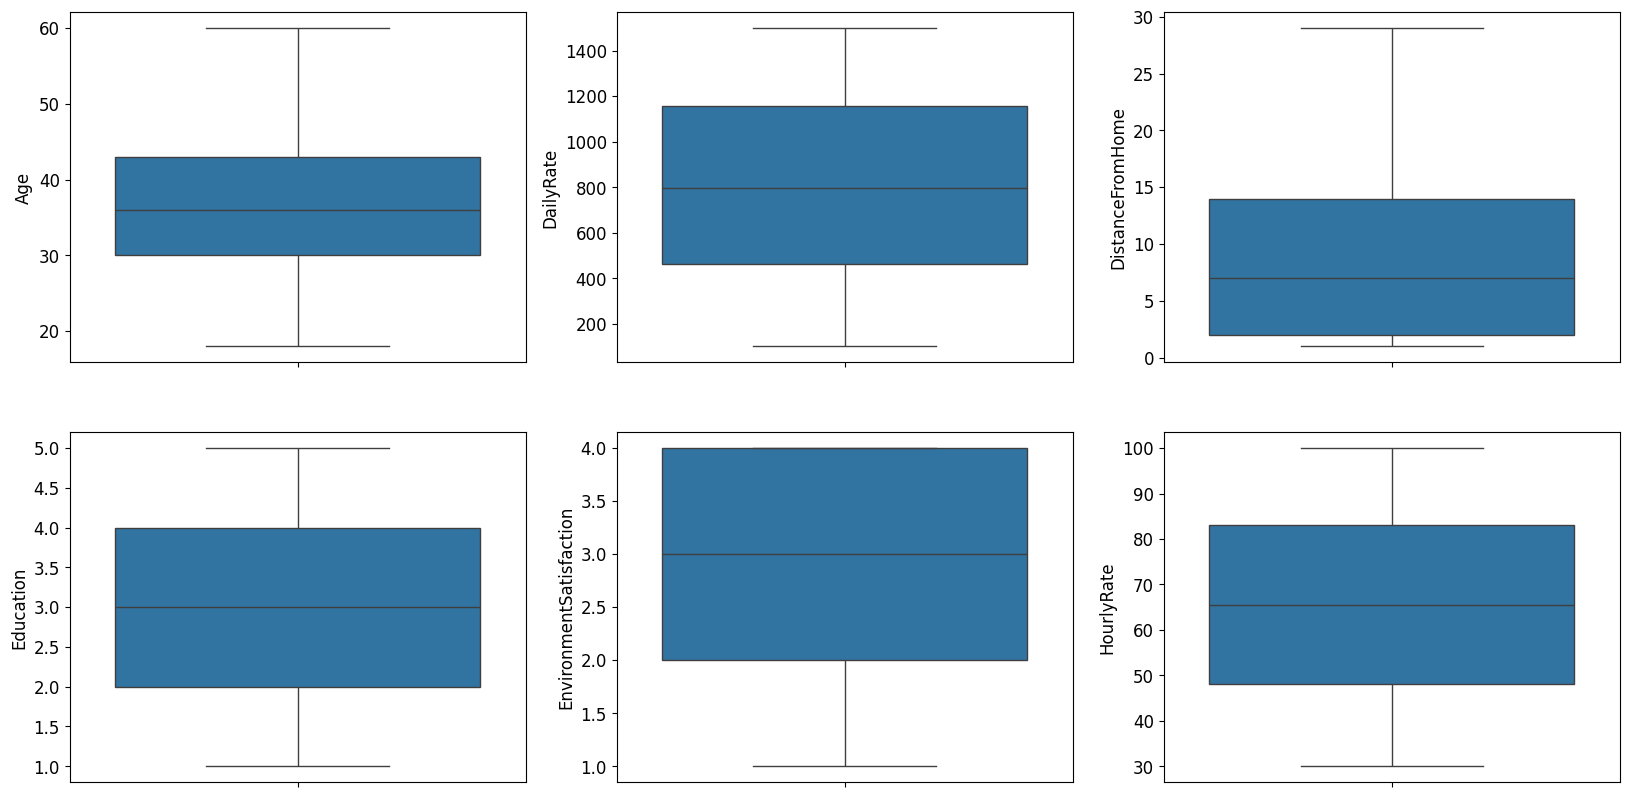

In [24]:
# Analysis of discrete data columns
num_cols = df.select_dtypes(include=np.number).columns
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
# Boxplot for all numerical columns
for variable, subplot in zip(num_cols, ax.flatten()):
    sns.boxplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [25]:
#Calculate Z-scores of all numerical columns
from scipy.stats import zscore
df_z = df[num_cols].apply(zscore)
print(df_z.head())
#Zscore
df_z.describe()

        Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0  0.452933   0.750837         -1.008126  -0.884927                -0.651470   
1  1.329511  -1.299105         -0.149829  -1.860033                 0.259935   
2  0.014644   1.425849         -0.885512  -0.884927                 1.171341   
3 -0.423644   1.473174         -0.762898   1.065286                 1.171341   
4 -1.081078  -0.521970         -0.885512  -1.860033                -1.562875   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  ...  \
0    1.412260        0.385287 -0.060036         1.142851      -0.110748  ...   
1   -0.221278       -1.015454 -0.060036        -0.669276      -0.293315  ...   
2    1.313258       -1.015454 -0.958436         0.236787      -0.936423  ...   
3   -0.468784        0.385287 -0.958436         0.236787      -0.763164  ...   
4   -1.260803        0.385287 -0.958436        -0.669276      -0.644909  ...   

   PerformanceRating  RelationshipSati

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1.676000e+03,1.676000e+03,1.676000e+03,1.676000e+03,1.676000e+03,1.676000e+03,1.676000e+03,1.676000e+03,1.676000e+03,1.676000e+03,...,1.676000e+03,1.676000e+03,1.676000e+03,1.676000e+03,1.676000e+03,1.676000e+03,1.676000e+03,1.676000e+03,1.676000e+03,1.676000e+03
mean,-3.810264e-16,-1.144669e-16,-4.451491e-17,6.995200e-17,1.759399e-16,1.102274e-16,-3.020655e-16,-7.313164e-17,-6.359273e-17,-7.737115e-17,...,-3.455205e-16,-1.208262e-16,4.239515e-18,-2.278739e-17,-1.017484e-16,2.808679e-16,-2.755685e-17,-8.479030e-17,-5.829333e-17,-5.723345e-17
std,1.000298e+00,1.000298e+00,1.000298e+00,1.000298e+00,1.000298e+00,1.000298e+00,1.000298e+00,1.000298e+00,1.000298e+00,1.000298e+00,...,1.000298e+00,1.000298e+00,1.000298e+00,1.000298e+00,1.000298e+00,1.000298e+00,1.000298e+00,1.000298e+00,1.000298e+00,1.000298e+00
min,-2.067228e+00,-1.739980e+00,-1.008126e+00,-1.860033e+00,-1.562875e+00,-1.755815e+00,-2.416195e+00,-9.584356e-01,-1.575340e+00,-1.165107e+00,...,-4.206736e-01,-1.594279e+00,-9.424906e-01,-1.447644e+00,-2.178097e+00,-2.515254e+00,-1.153553e+00,-1.176083e+00,-6.815528e-01,-1.162098e+00
25%,-7.523610e-01,-8.358134e-01,-8.855122e-01,-8.849267e-01,-6.514700e-01,-8.647937e-01,-1.015454e+00,-9.584356e-01,-6.692760e-01,-7.590920e-01,...,-4.206736e-01,-6.664971e-01,-9.424906e-01,-6.816207e-01,-6.253574e-01,-1.091076e+00,-6.615220e-01,-6.245679e-01,-6.815528e-01,-6.000791e-01
50%,-9.492771e-02,-1.010743e-02,-2.724428e-01,9.017990e-02,2.599354e-01,1.476765e-03,3.852874e-01,-6.003623e-02,2.367875e-01,-3.421825e-01,...,-4.206736e-01,2.612846e-01,2.267279e-01,-1.709384e-01,1.510122e-01,3.331012e-01,-3.335010e-01,-3.488103e-01,-3.718233e-01,-3.190697e-01
75%,6.720778e-01,8.878323e-01,5.858544e-01,1.065286e+00,1.171341e+00,8.677472e-01,3.852874e-01,8.383631e-01,1.142851e+00,3.942711e-01,...,-4.206736e-01,1.189066e+00,2.267279e-01,4.674145e-01,1.510122e-01,3.331012e-01,4.865514e-01,7.542201e-01,2.476358e-01,8.049677e-01
max,2.534805e+00,1.739692e+00,2.425063e+00,2.040393e+00,1.171341e+00,1.709267e+00,1.786028e+00,2.635162e+00,1.142851e+00,2.852202e+00,...,2.377140e+00,1.189066e+00,2.565165e+00,3.659179e+00,2.480121e+00,1.757279e+00,5.406866e+00,3.787554e+00,3.964390e+00,3.615061e+00


<h2> Data Visualization

In [26]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


Data Preprocessing

In [27]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
#Ordinal Encoding
ordinal_encoder = OrdinalEncoder()
df['BusinessTravel'] = ordinal_encoder.fit_transform(df[['BusinessTravel']])

#Label Encoding
label_encoder = LabelEncoder()
df['Department'] = label_encoder.fit_transform(df['Department'])
df['EducationField'] = label_encoder.fit_transform(df['EducationField'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['JobRole'] = label_encoder.fit_transform(df['JobRole'])
df['MaritalStatus'] = label_encoder.fit_transform(df['MaritalStatus'])
df['OverTime'] = label_encoder.fit_transform(df['OverTime'])
df['Attrition'] = label_encoder.fit_transform(df['Attrition'])

In [29]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,2.0,1102,0,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


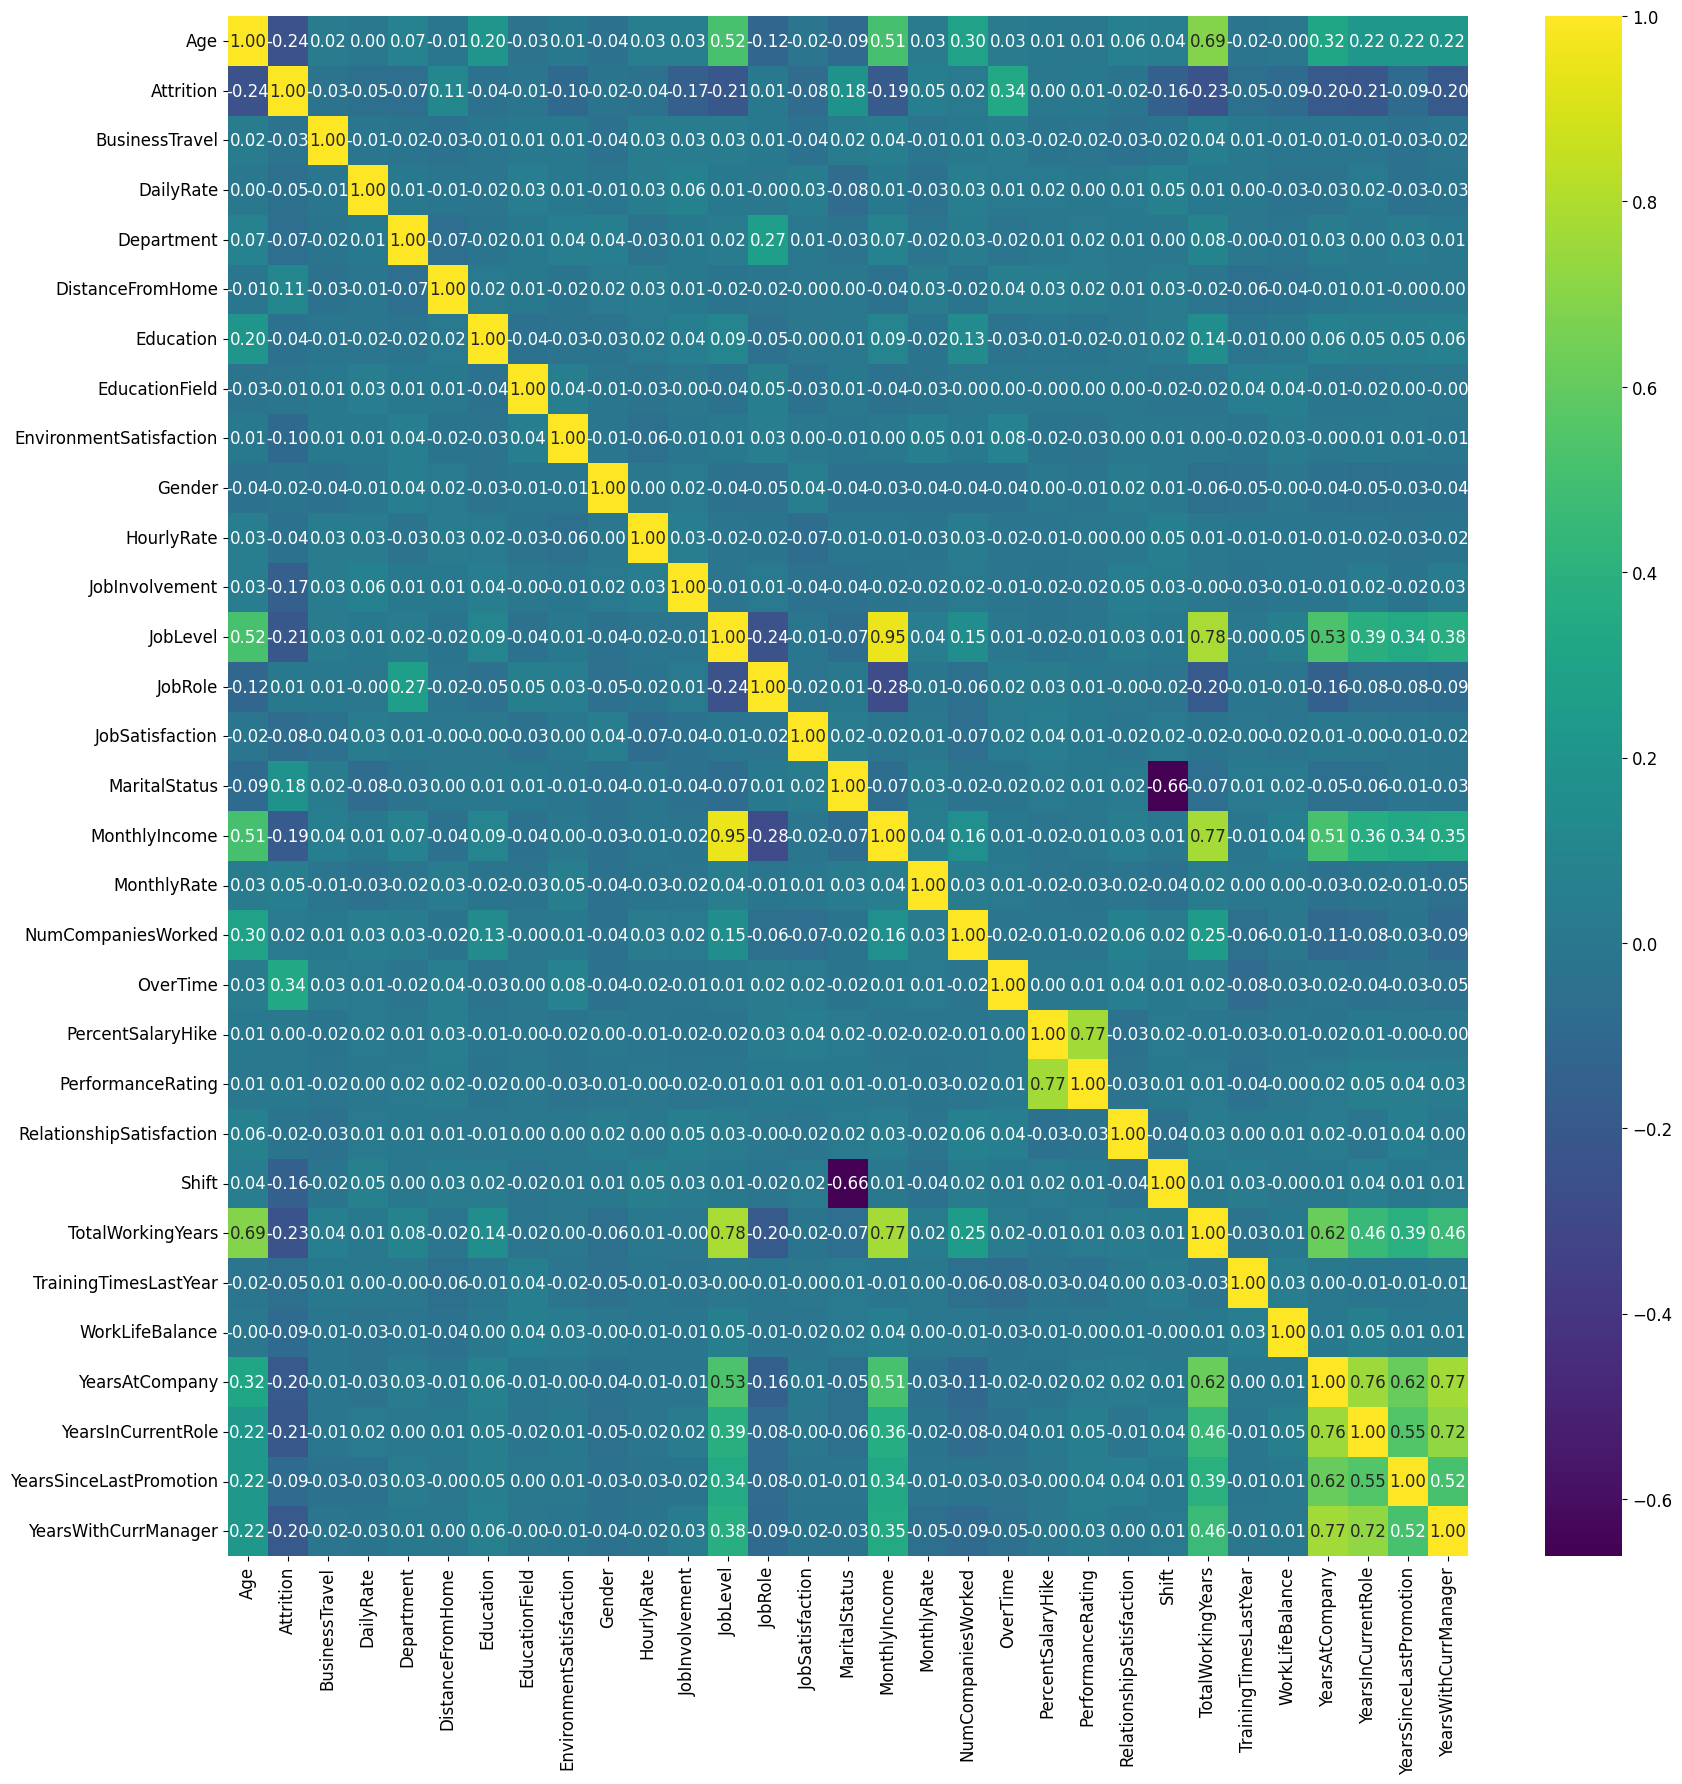

In [30]:
#Correlation Matrix of the dataset using heatmap according to Attrition
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.show()


iki bağımsız değişken arasında çok yüksekle çoklu doğrusal bağlantı problemi sorunu araştır

In [31]:
#yüksek korelasyonlu değişkenlerin çıkarılması
# 'MonthlyIncome', "YearsAtCompany", PerformanceRating
df = df.drop(['MonthlyIncome', "YearsAtCompany", "PerformanceRating", "YearsWithCurrManager", "TotalWorkingYears", "Shift"], axis=1)

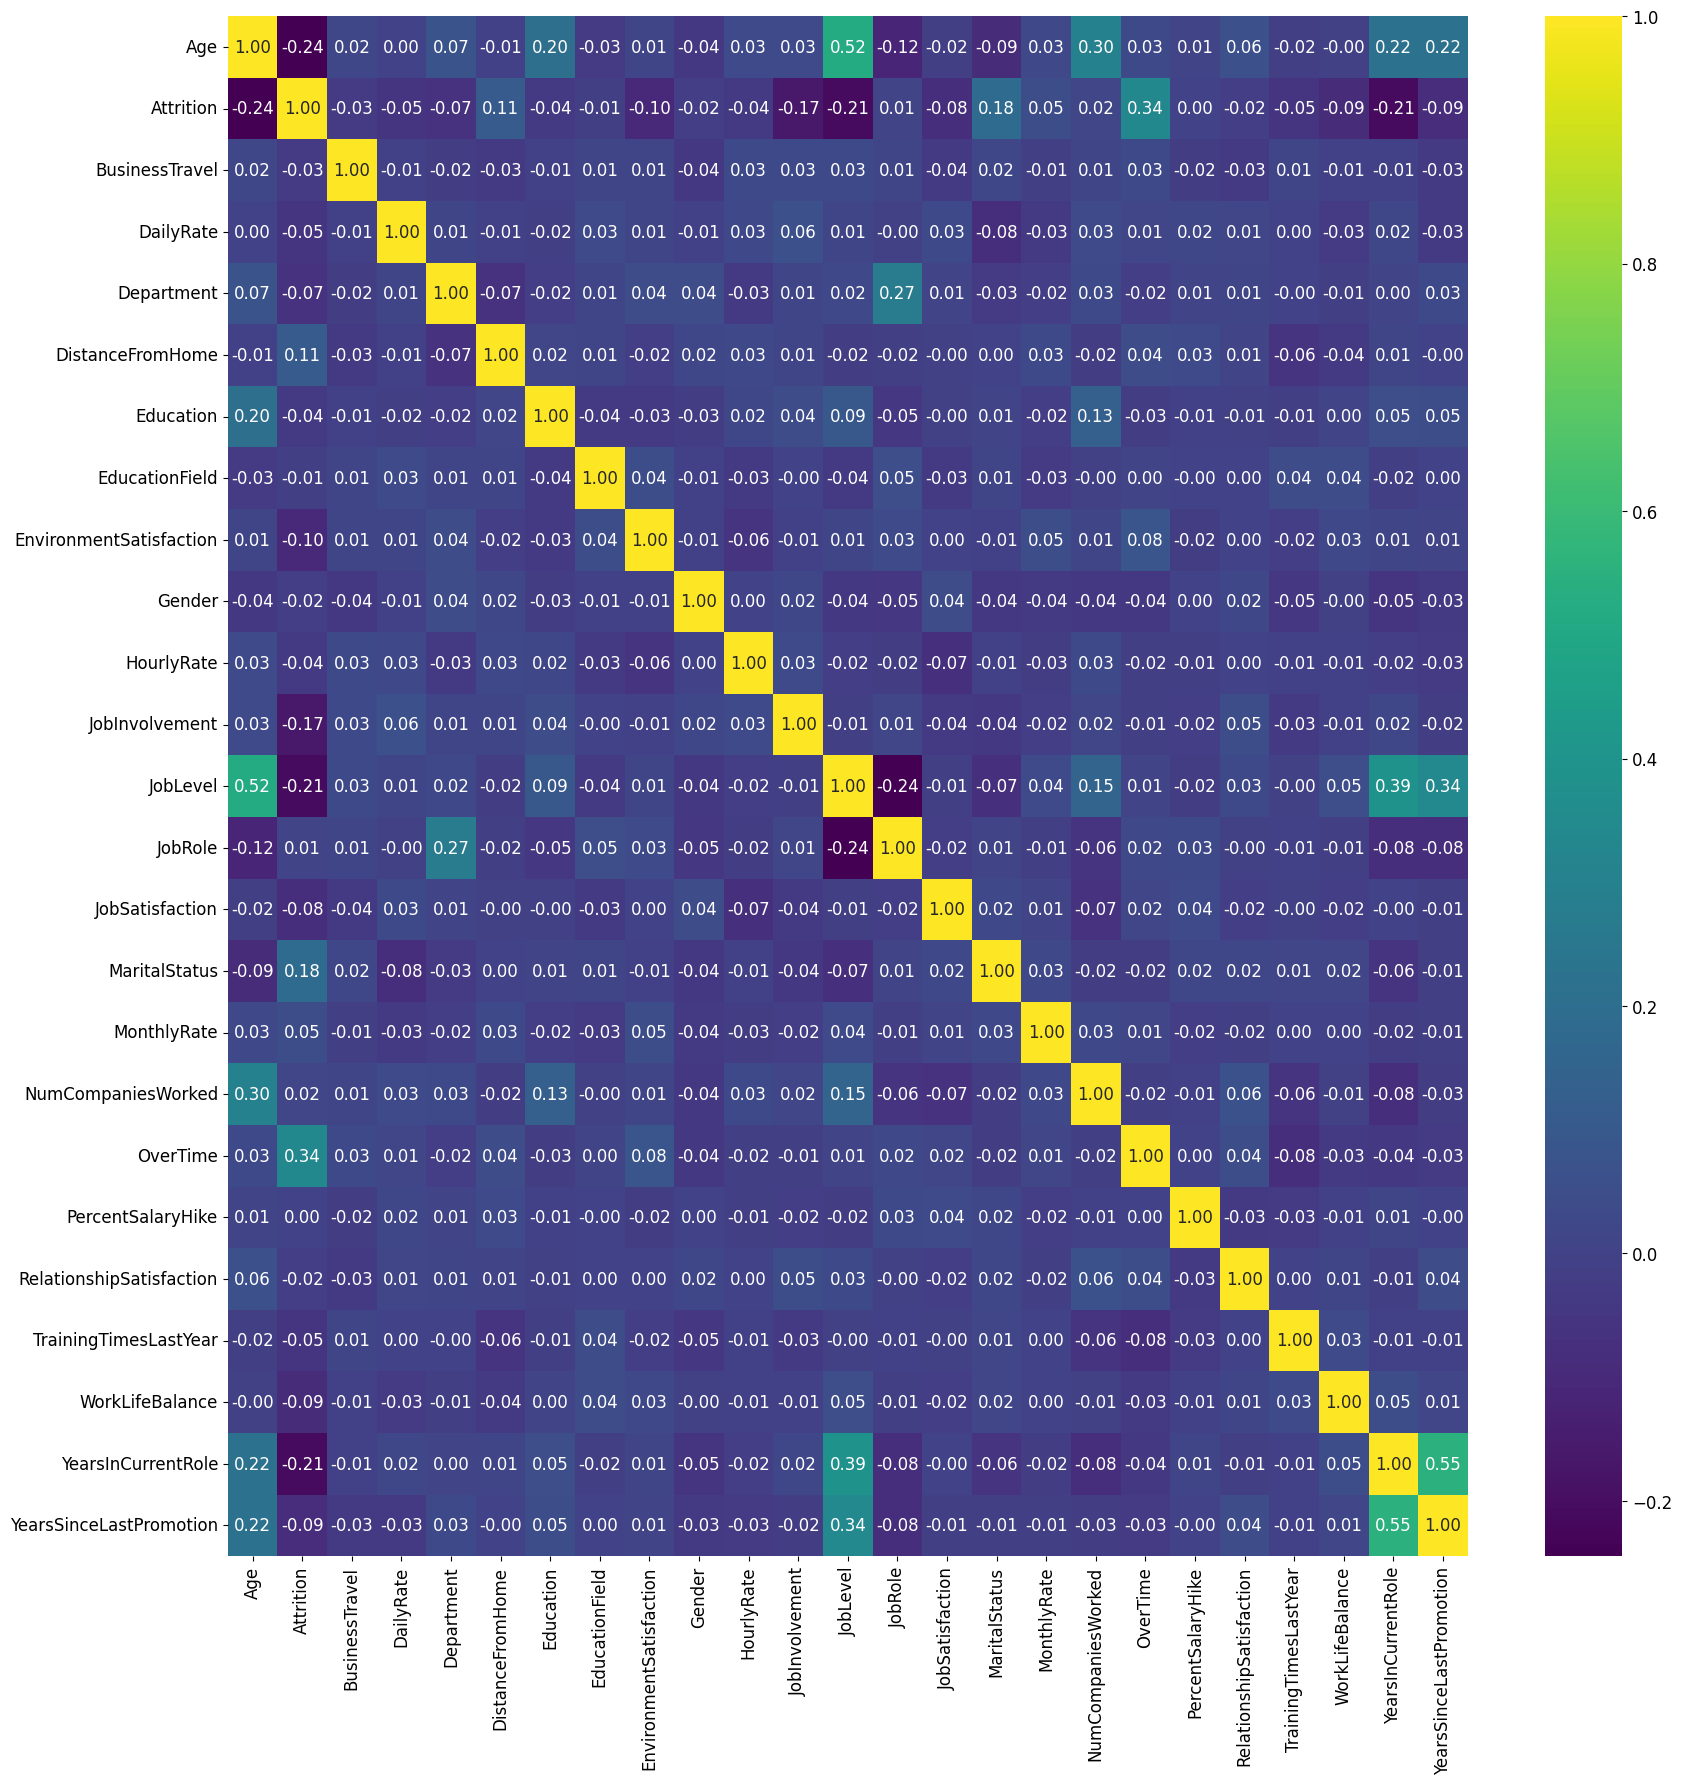

In [32]:
#Correlation Matrix of the dataset using heatmap according to Attrition
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.show()

<h2> Model Selection

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [34]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

%25 veri neye göre belirleniyor sağlıklı olması için kaç olmalı gibi

In [35]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

models = {
    'Logistic Regression': LogisticRegression(),
    'Ridge Classifier': RidgeClassifier(),
    'SGD Classifier': SGDClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Extra Tree': ExtraTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Bagging Classifier': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'SVM': SVC(),
    'NuSVC': NuSVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Radius Neighbors': RadiusNeighborsClassifier(),
    'Naive Bayes (Gaussian)': GaussianNB(),
    'Naive Bayes (Bernoulli)': BernoulliNB(),
    'MLP Classifier': MLPClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'CatBoost': CatBoostClassifier()
}


In [36]:
from sklearn.metrics import accuracy_score
results = {}

# Train and evaluate each model
for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy
        print(f"{name}: Accuracy - {accuracy:.4f}")
    except Exception as e:
        print(f"{name}: Model could not be trained or evaluated - {e}")

# Print results
print("\nAccuracy Scores:")
for name, acc in results.items():
    print(f"{name}: {acc}")

# Identify the best model based on accuracy
if results:
    best_model = max(results, key=results.get)
    print(f"\nBest Model: {best_model} with accuracy {results[best_model]}")
else:
    print("No models could be evaluated successfully.")


Logistic Regression: Accuracy - 0.9141
Ridge Classifier: Accuracy - 0.8711
SGD Classifier: Accuracy - 0.9141
Decision Tree: Accuracy - 0.8735
Extra Tree: Accuracy - 0.8496
Random Forest: Accuracy - 0.8831
Extra Trees: Accuracy - 0.8854
Bagging Classifier: Accuracy - 0.8831
AdaBoost: Accuracy - 0.9069
Gradient Boosting: Accuracy - 0.9117
XGBoost: Accuracy - 0.8950
[LightGBM] [Info] Number of positive: 137, number of negative: 1120
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000299 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 1257, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.108990 -> initscore=-2.101103
[LightGBM] [Info] Start training from score -2.101103
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM: Accuracy - 0.9045
SVM: Accuracy - 0.8998
NuSVC: Model could 

<h2> Logistic Regression

In [37]:
#Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression:
Accuracy: 0.9140811455847255
Confusion Matrix:


NameError: name 'confusion_matrix' is not defined

Hyperparameter Tuning

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'max_iter': [100, 1000, 10000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'tol': [1e-3, 1e-4, 1e-5],
    'fit_intercept': [True, False]
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, n_jobs=-1, verbose=2, acc)

grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
print("Best Estimator:", grid_search.best_estimator_)
print("---------------------------------------------------------------------------------------------")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 504 candidates, totalling 2520 fits
Accuracy: 0.9116945107398569
Best Parameters: {'C': 10, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.0001}
Best Score: 0.9308069310061342
Best Estimator: LogisticRegression(C=10, solver='saga')
---------------------------------------------------------------------------------------------
Confusion Matrix:
[[343  14]
 [ 23  39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       357
           1       0.74      0.63      0.68        62

    accuracy                           0.91       419
   macro avg       0.84      0.79      0.81       419
weighted avg       0.91      0.91      0.91       419



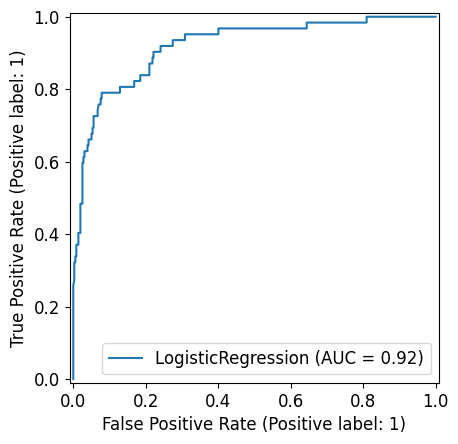

AUC Score: 0.7949082858950032


In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

model = grid_search.best_estimator_ 
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()
auc_score = roc_auc_score(y_test, y_pred)
print(f"AUC Score: {auc_score}")

<h3>Predictions

In [ ]:
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions.tail(20)

,Actual,Predicted
208,0,0
1010,0,0
1308,1,1
526,0,0
58,0,0
1125,0,0
1329,1,1
560,1,0
904,0,0
1323,1,1


In [ ]:
#Save model
import joblib
joblib.dump(model, 'model.pkl')


NameError: name 'model' is not defined